In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas.io.data as web
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

C:\Users\Miya\Anaconda3\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
colors = ['red','blue','pink','green','blue','yellow','purple','orange']
stocks = ['GOOG','YHOO','AAPL','MSFT','AMZN','JPM','BAC','NEW']
s_date = '6/1/2006'
e_date = '6/1/2016'

In [3]:
cd onedrive/miya'sgithub/financial-modeling

[WinError 3] The system cannot find the path specified: "onedrive/miya'sgithub/financial-modeling"
C:\Users\Miya\OneDrive\Miya'sGithub\Financial-Modeling


In [4]:
mkdir Data_for_Homework1

A subdirectory or file Data_for_Homework1 already exists.


In [5]:
cd Data_for_Homework1

C:\Users\Miya\OneDrive\Miya'sGithub\Financial-Modeling\Data_for_Homework1


In [6]:
def retrieve_save_data(stocks):
    for stock in stocks:
        data = web.DataReader(stock,data_source = 'google',start = s_date,end = e_date)
        data.to_csv(stock+'.csv')

In [8]:
retrieve_save_data(stocks)

In [9]:
def time_series_pattern_volatility(stocks,colors):
    for stock,color in zip(stocks,colors):
        data = web.DataReader(stock,data_source = 'google',start = s_date,end = e_date)
        S_i = data['Close']
        S_i_minus_1 = data['Close'].shift(1)
        data['U_sequence'] = np.log(S_i/S_i_minus_1)
        U_sequence = data['U_sequence']
        data['Volatility'] = pd.rolling_std(U_sequence, window = 252)* np.sqrt(252)
        data['Volatility'].plot(color = color,figsize=(15,6),label=stock)
        plt.legend(loc='best')
        plt.xlabel('time')
        plt.ylabel('Volatility')
        plt.title('Volatility Comparison',fontsize=20)

In [10]:
def time_series_pattern_close(stocks,colors):
    for stock,color in zip(stocks,colors):
        data = web.DataReader(stock,data_source = 'google',start = s_date,end = e_date)
        data['Close'].plot(color = color,figsize=(15,6),label=stock)
        plt.legend(loc='best')
        plt.xlabel('time')
        plt.ylabel('Close Price')
        plt.title('Close Price Comparison')
        plt.title('Close Price Comparison',fontsize=20)

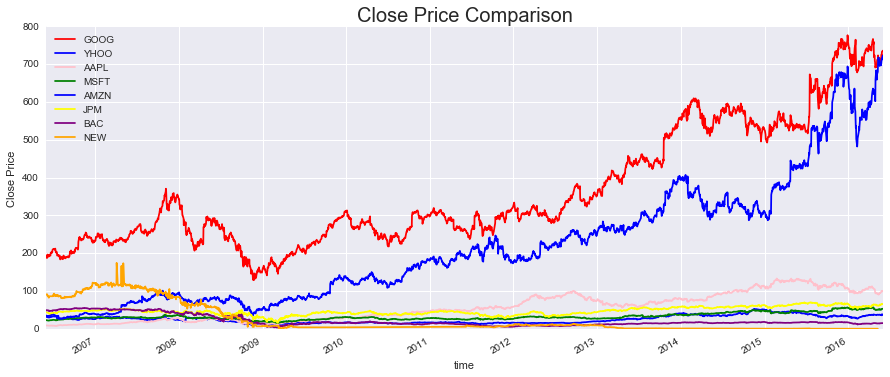

In [11]:
time_series_pattern_close(stocks,colors)

C:\Users\Miya\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=252).std()


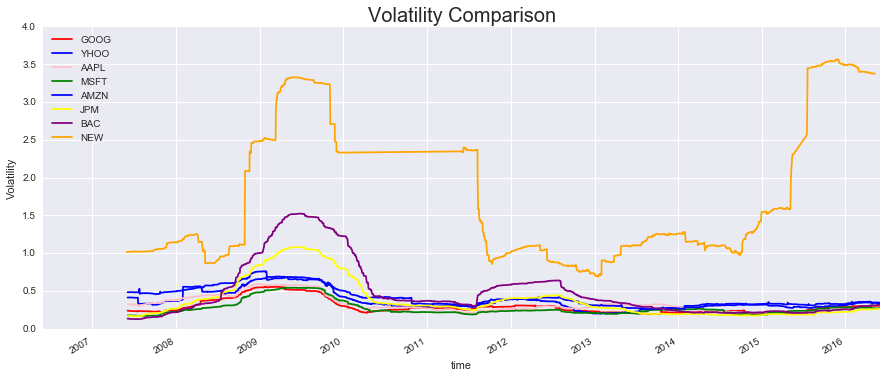

In [12]:
time_series_pattern_volatility(stocks,colors)

In [13]:
def histogram_price(stocks):
    close_price = []
    stock_name = []
    dict_new = dict()
    
    for stock in stocks:
        data = web.DataReader(stock,data_source = 'google',start = s_date,end = e_date)
        close_price.extend(data['Close'].values)
        stock_name.extend([stock]*len(data))
    dict_new['price'] = close_price
    dict_new['stock'] = stock_name
    df_new = pd.DataFrame.from_dict(dict_new)
    df_new['price'].hist(by = df_new['stock'],figsize=(15,10))

In [20]:
def histogram_volume(stocks):
    volume = []
    stock_name = []
    dict_new = dict()
    
    for stock in stocks:
        data = web.DataReader(stock,data_source = 'google',start = s_date,end = e_date)
        volume.extend(data['Volume'])
        stock_name.extend([stock]*len(data))
    dict_new['volume'] = volume
    dict_new['stock'] = stock_name
    df_new = pd.DataFrame.from_dict(dict_new)
    df_new['volume'].hist(by = df_new['stock'],figsize=(15,10),color = 'red')

Price Distribution:



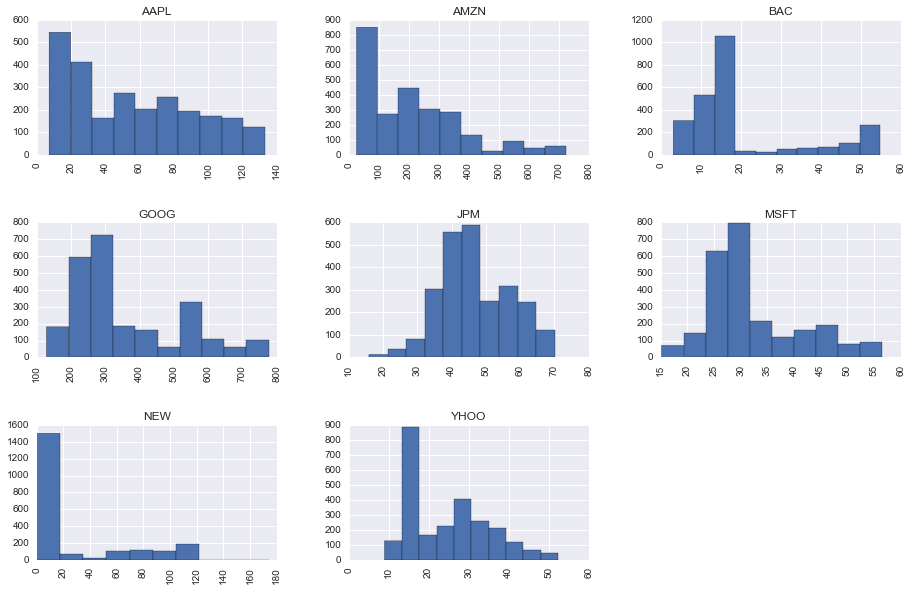

In [15]:
print('Price Distribution:\n')
histogram_price(stocks)

Volume Distribution:



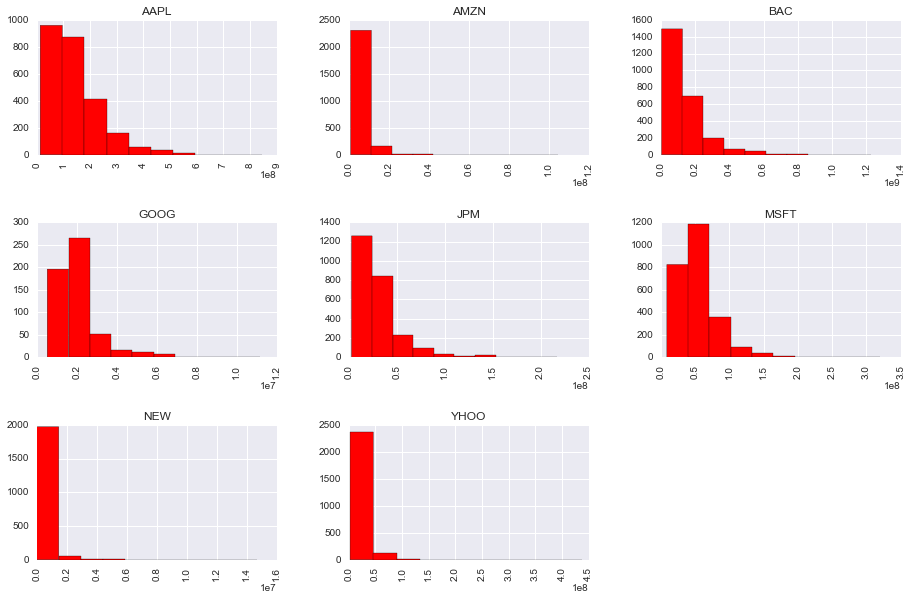

In [21]:
print('Volume Distribution:\n')
histogram_volume(stocks)

#### Another way to plot distribution:

In [ ]:
def kde_plot_close(stocks,colors):
    for stock,color in zip(stocks,colors):
        data = web.DataReader(stock,data_source = 'google',start = s_date,end = e_date)
        sns.kdeplot(data['Close'],label = stock)
        plt.legend()

In [ ]:
kde_plot_close(stocks,colors)

**The following code doesn't work. **

#### Compare Google and JP Morgan

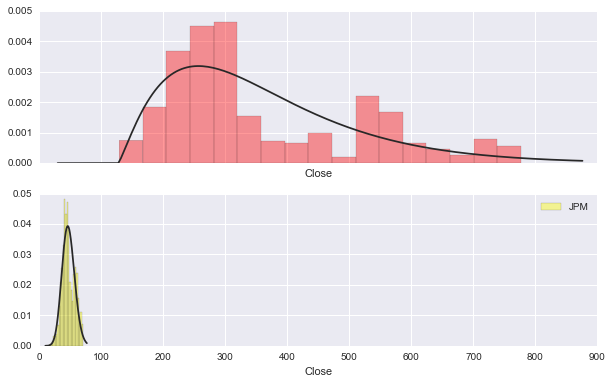

In [57]:
from scipy import stats
f, axes = plt.subplots(2, 1, figsize=(10, 6),sharex=True)
sns.despine(left=True)
GOOG = web.DataReader('GOOG',data_source = 'google',start = s_date,end = e_date)
sns.distplot(GOOG['Close'], kde=False, fit=stats.gamma,label = 'GOOG',ax=axes[0],color = 'red')
JPM = web.DataReader('JPM',data_source = 'google',start = s_date,end = e_date)
sns.distplot(JPM['Close'], kde=False, fit=stats.gamma,label = 'JPM',ax=axes[1],color = 'yellow')
plt.legend()

In [54]:
def compute_stats(stocks,target):
    df = pd.DataFrame(columns=('mean', 'standard_deviation', 'skewness','kurtosis'),index = stocks)
    for stock in stocks:
        data = web.DataReader(stock,data_source = 'google',start = s_date,end = e_date)
        df.loc[stock] = [data[target].mean(),data[target].std(),data[target].skew(),data[target].kurtosis()]
    print ('Statistical facts about %s:' % target)
    return df

In [55]:
compute_stats(stocks,target = 'Close')

Statistical facts about Close:


,mean,standard_deviation,skewness,kurtosis
GOOG,362.108,158.405,0.89719,-0.331057
YHOO,24.7126,9.91519,0.620839,-0.603557
AAPL,55.8081,36.1703,0.420067,-1.08038
MSFT,32.1784,8.91066,0.939393,0.0848304
AMZN,215.925,160.078,1.07433,0.64478
JPM,46.7411,10.1861,0.161807,-0.44851
BAC,20.8383,14.5311,1.28649,0.164954
NEW,26.9499,39.7618,1.31668,0.135479


In [56]:
compute_stats(stocks,target = 'Volume')

Statistical facts about Volume:


,mean,standard_deviation,skewness,kurtosis
GOOG,2.04577e+06,1.03511e+06,2.94689,14.5298
YHOO,2.3128e+07,1.91936e+07,7.95758,120.344
AAPL,1.42693e+08,9.85476e+07,1.72786,4.74759
MSFT,5.49772e+07,2.90348e+07,2.43613,11.5492
AMZN,6.29443e+06,5.41548e+06,6.36825,74.3746
JPM,3.11185e+07,2.40445e+07,2.45035,8.52732
BAC,1.37631e+08,1.2559e+08,2.44282,10.0366
NEW,194789,798689,7.76237,88.8162


In [45]:
def extraordinary_high_price(stocks):
    for stock in stocks:
        data = web.DataReader(stock,data_source = 'google',start = s_date,end = e_date)
        print("for %s, ten highest price records are as follows:" % stock)
        print(data[data['Close']>data['Close'].quantile(q = 0.95)].sort('Close',ascending = False)['Close'][:10])
        print()

In [46]:
extraordinary_high_price(stocks)

for GOOG, ten highest price records are as follows:
Date
2015-12-29    776.60
2015-12-30    771.00
2015-12-01    767.04
2015-12-04    766.81
2016-04-18    766.61
2016-02-02    764.65
2015-12-07    763.25
2015-12-28    762.51
2015-12-02    762.38
2015-12-08    762.37
Name: Close, dtype: float64



C:\Users\Miya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


for YHOO, ten highest price records are as follows:
Date
2014-11-17    52.37
2014-11-26    51.93
2014-11-24    51.83
2014-11-14    51.75
2014-11-18    51.75
2014-11-28    51.74
2014-11-25    51.72
2014-11-20    51.25
2014-12-30    51.22
2014-12-22    51.15
Name: Close, dtype: float64

for AAPL, ten highest price records are as follows:
Date
2015-02-23    133.00
2015-04-27    132.65
2015-05-22    132.54
2015-02-24    132.17
2015-07-20    132.07
2015-05-27    132.04
2015-05-28    131.78
2015-05-21    131.39
2015-07-21    130.75
2015-04-28    130.56
Name: Close, dtype: float64

for MSFT, ten highest price records are as follows:
Date
2015-12-29    56.55
2016-04-18    56.46
2016-04-19    56.39
2015-12-30    56.31
2015-12-16    56.13
2015-12-28    55.95
2015-12-04    55.91
2015-12-23    55.82
2015-12-07    55.81
2015-12-08    55.79
Name: Close, dtype: float64

for AMZN, ten highest price records are as follows:
Date
2016-05-31    722.79
2016-06-01    719.44
2016-05-12    717.93
2016-05-26  

In [33]:
def barrier_option_price(S,K,r,T,Sb,sigma,type = 'down-and-out put'):
    a = (Sb/S) ** (-1+2*r/(sigma**2))
    b = (Sb/S) ** (1+2*r/(sigma**2))
    d_1 = (np.log(S/K)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d_2 = (np.log(S/K)+(r-sigma**2/2)*T)/(sigma*np.sqrt(T))
    d_3 = (np.log(S/Sb)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d_4 = (np.log(S/Sb)+(r-sigma**2/2)*T)/(sigma*np.sqrt(T))
    d_5 = (np.log(S/Sb)-(r-sigma**2/2)*T)/(sigma*np.sqrt(T))
    d_6 = (np.log(S/Sb)-(r+sigma/2)*T)/(sigma*np.sqrt(T))
    d_7 = (np.log(S*K/Sb**2)-(r-sigma**2/2)*T)/(sigma*np.sqrt(T))
    d_8 = (np.log(S*K/Sb**2)-(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    
    N_1 = stats.norm.cdf(d_1,0.0,1.0)
    N_2 = stats.norm.cdf(d_2,0.0,1.0)
    N_3 = stats.norm.cdf(d_3,0.0,1.0)
    N_4 = stats.norm.cdf(d_4,0.0,1.0)
    N_5 = stats.norm.cdf(d_5,0.0,1.0)
    N_6 = stats.norm.cdf(d_6,0.0,1.0)
    N_7 = stats.norm.cdf(d_7,0.0,1.0)
    N_8 = stats.norm.cdf(d_8,0.0,1.0)
    if type == 'down-and-out put':
        price = K * np.exp(-1*r*T) * (N_4 - N_2 - a*(N_7-N_5))-S*(N_3-N_1-b*(N_8-N_6))
        return price
    else:
        print('Your barrier option type is out of consideration for this model!')

In [38]:
def bs_put_value(S,K,T,r,sigma):
    d1 = (np.log(S/K) + (r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    N_d1 = stats.norm.cdf(-d1,0.0,1.0)
    N_d2 = stats.norm.cdf(-d2,0.0,1.0)
    
    put_price = -S*N_d1 + K*np.exp(-r * T) * N_d2
    
    return put_price

In [15]:
Sb = [i*10 for i in range(1,8)]
S = 100
K = 105
r = 0.05
T = 0.75
sigma = 0.4

In [16]:
Sb

[10, 20, 30, 40, 50, 60, 70]

In [41]:
print('Price for down-and-out put option:')
print()
print([barrier_option_price(S,K,r,T,i,sigma) for i in Sb])
print()
print('Price for BS model:')
bs_put_value(S,K,T,r,sigma)

Price for down-and-out put option:

[14.404020091541419, 14.403747906290754, 14.37175224998672, 13.99556923575814, 12.647215320514363, 10.395990796863202, 8.4788859160817509]

Price for BS model:


14.404020094764824

In [42]:
sigma = [i*0.05 for i in range(2,12)]
S = 100
K = 105
r = 0.5
T = 0.75
Sb = 60

In [43]:
print('Price for down-and-out put option:')
print()
print([barrier_option_price(S,K,r,T,Sb,i) for i in sigma])
print()
print('Price for BS model:')
print()
print([bs_put_value(S,K,T,r,i) for i in sigma])

Price for down-and-out put option:

[0.00014406307392578806, 0.021325754698886479, 0.1693082362081868, 0.52679693164176822, 1.0691779676213002, 1.688317185124907, 2.2592362283593417, 2.7021077331471872, 2.9908406714525118, 3.1326817439020171]

Price for BS model:

[0.00014406307392174529, 0.021325754904102323, 0.16931998773612866, 0.5285932969297038, 1.0971885109145045, 1.8378194268291193, 2.7109642167495682, 3.6841382559913036, 4.7325164228553227, 5.8374720015432331]


In [46]:
barrier_option_price(S,K,r,T,Sb,sigma[0],type = 'down-and-in put')

Your barrier option type is out of consideration for this model!
